# Association Rule Mining via Apriori Algorithm

Motive :

Use the churn data set. Filter out all variables except the following: VMail Plan, Intl Plan, CustServ Calls, and Churn. Set CustServ Calls to be ordinal. Allow the three predictors to be in either antecedent or consequent, but do not allow Churn to be in the antecedent.

Set the minimum antecedent support to 1%, the minimum rule confidence to 5%, and the maximum number of antecedents to 1. Use rule confidence as your evaluation measure.

a)Find the association rule with the greatest lift.
b)Report the following for the rule in (a): Number of instances, Support %, Confidence %, Lift.

# Import Libraries

In [14]:
import pandas as pd
import numpy as np
from apyori import apriori  
#from mlxtend.frequent_patterns import apriori, association_rules

# Import dataset

In [40]:
df = pd.read_csv("E:/sakshi/all subjects of MS/Trimester 6/Predictive Analytics/Class 1/churn.txt")

In [41]:
df.shape

(3333, 21)

In [42]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Filter out all variables except the following: VMail Plan, Intl Plan, CustServ Calls, and Churn

In [43]:
predictors = ["VMail Plan","Int'l Plan","CustServ Calls","Churn"]
df = df[predictors]
df.head()

,VMail Plan,Int'l Plan,CustServ Calls,Churn
0,yes,no,1,False.
1,yes,no,1,False.
2,no,no,0,False.
3,no,yes,2,False.
4,no,yes,3,False.


# Null Values in these 4 Columns

In [68]:
df.isnull().sum()

VMail Plan        0
Int'l Plan        0
CustServ Calls    0
Churn             0
dtype: int64

# Statistical terms of data

In [69]:
df.describe()

,CustServ Calls
count,3333.000000
mean,1.562856
std,1.315491
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,9.000000


# Exploratory Data Analysis

# Variable 1 : Churn

In [50]:
df['Churn'].value_counts()


False.    2850
True.      483
Name: Churn, dtype: int64

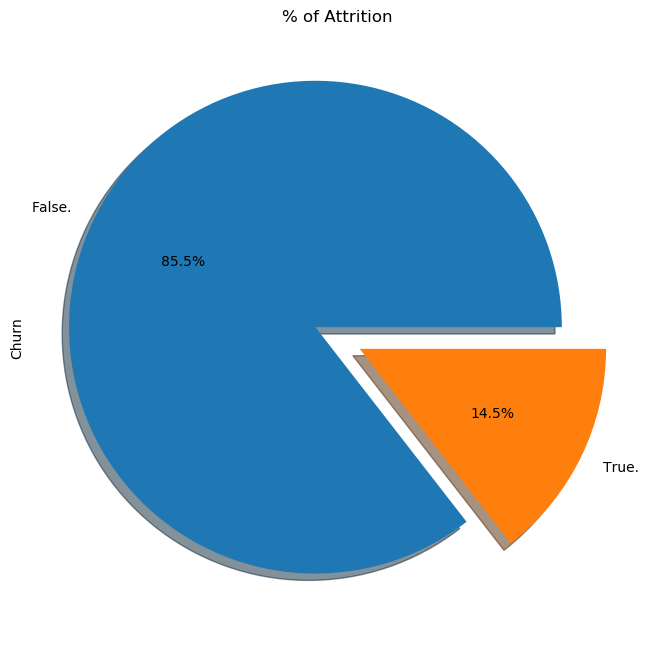

In [51]:
import matplotlib.pyplot as plt; plt.rcdefaults()
df['Churn'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("% of Attrition")
plt.show()

# Variable 2 : Int'l Plan

In [52]:
df["Int'l Plan"].value_counts()

no     3010
yes     323
Name: Int'l Plan, dtype: int64

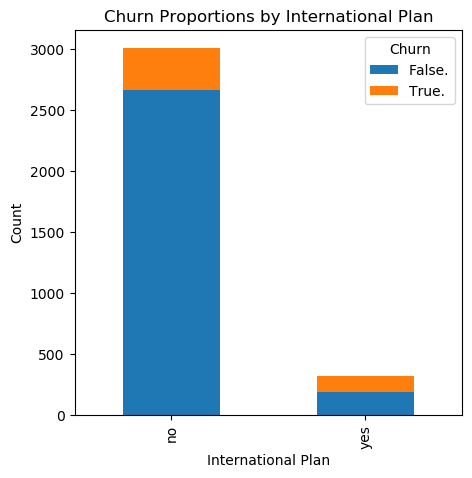

In [53]:
df.groupby(["Int'l Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5),title = "Churn Proportions by International Plan")
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

# Variable 3 : VMail Plan

In [55]:
df["VMail Plan"].value_counts()

no     2411
yes     922
Name: VMail Plan, dtype: int64

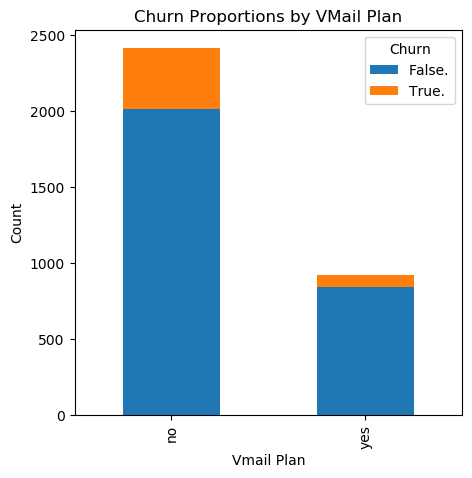

In [60]:
df.groupby(["VMail Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5),title = "Churn Proportions by VMail Plan")
plt.xlabel('Vmail Plan')
plt.ylabel('Count')
plt.show()

# Variable 4 : CustServ Calls

In [62]:
df['CustServ Calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: CustServ Calls, dtype: int64

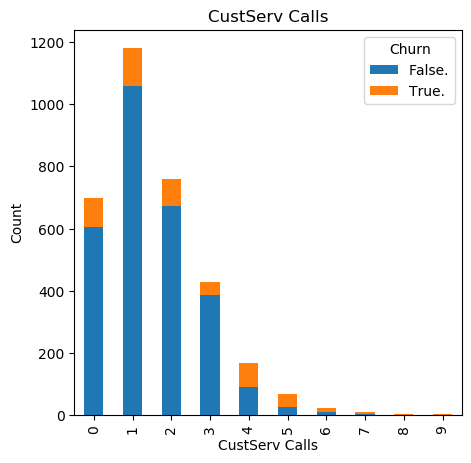

In [64]:
df.groupby(["CustServ Calls", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5),title = "CustServ Calls")
plt.xlabel('CustServ Calls')
plt.ylabel('Count')
plt.show()

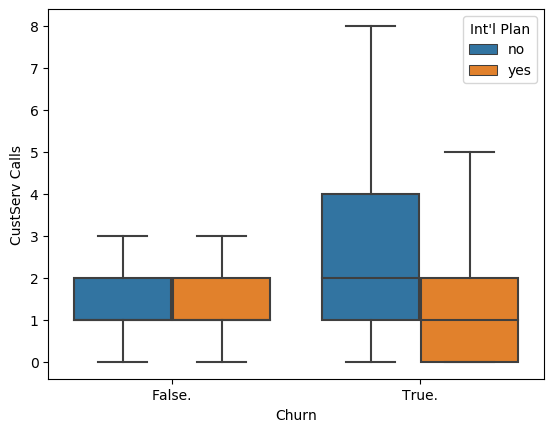

In [65]:
sns.boxplot(x = 'Churn', y = 'CustServ Calls', data = df, sym = "", hue = "Int'l Plan") 
plt.title('')
plt.show() 

# Don't need to set CustServ Calls to be ordinal because it's already ordinal

In [11]:
print("CustServ Calls:\n", df["CustServ Calls"].unique())
list(df["CustServ Calls"]).sort(key=float)

CustServ Calls:
 [1 0 2 3 4 5 7 9 6 8]


#                       Association Rule Mining via Apriori Algorithm

# a)Find the association rule with the greatest lift.
# b)Report the following for the rule in (a): Number of instances, Support %, Confidence %, Lift.

In [ ]:
# list of lists of transactions
rec = []
for i in range(3333):
    rec.append([str(df.values[i,j]) for j in range(0, 4)])

# Set the minimum antecedent support to 1%, the minimum rule confidence to 5%,and the maximum number of antecedents to 1.
# Use rule confidence as your evaluation measure.

In [29]:
association_rules = apriori(rec, min_support=0.01, min_confidence=0.05, max_len=2, min_lift=2)
association_results = list(association_rules)

In [38]:
print("Total Rules:", len(association_results))
print("\nAssociation Rule's Result:\n", association_results[0])
print("******************************************************")
print("\nAssociation Rule's Result:\n", association_results[1])
print("******************************************************") 

Total Rules: 4

Association Rule's Result:
 RelationRecord(items=frozenset({'True.', '4'}), support=0.022802280228022803, ordered_statistics=[OrderedStatistic(items_base=frozenset({'4'}), items_add=frozenset({'True.'}), confidence=0.4578313253012048, lift=3.1593205118611087), OrderedStatistic(items_base=frozenset({'True.'}), items_add=frozenset({'4'}), confidence=0.15734989648033126, lift=3.1593205118611087)])
******************************************************

Association Rule's Result:
 RelationRecord(items=frozenset({'True.', '5'}), support=0.012001200120012, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5'}), items_add=frozenset({'True.'}), confidence=0.606060606060606, lift=4.182194616977225), OrderedStatistic(items_base=frozenset({'True.'}), items_add=frozenset({'5'}), confidence=0.08281573498964802, lift=4.182194616977225)])
******************************************************


Formula's :--

Support - popularity of item
Support(I) = (Transactions containing (I))/(Total Transactions)

Confidence - popularity of item being bought if another item bought
Confidence(I→J) = (Transactions containing both (I and J))/(Transactions containing I)

Lift - ratio of sale of J when I is sold
Lift(I→J) = (Confidence (I→J))/(Support (J))

In [39]:
for item in association_results:

    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # next index of support
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("******************************************************")

Rule: True. -> 4
Support: 0.022802280228022803
Confidence: 0.4578313253012048
Lift: 3.1593205118611087
******************************************************
Rule: True. -> 5
Support: 0.012001200120012
Confidence: 0.606060606060606
Lift: 4.182194616977225
******************************************************
Rule: no -> True.
Support: 0.0222022202220222
Confidence: 0.4457831325301204
Lift: 3.3239265787984147
******************************************************
Rule: no -> True.
Support: 0.0111011101110111
Confidence: 0.5606060606060606
Lift: 4.180089485458613
******************************************************


# Conclusion:

3333 x 21 churn data set was sliced to 3333 x 4
3 predictors (VMail Plan, Intl Plan, and CustServ CallsSet) and 1 target (Churn)
No Null values
There are ~85.5 % False and ~14.5% True Churns



    
--->The Association Rule with the greatest Lift found in  second result of Rule {True -> 5} which had a Lift of 4.18, which was the ratio of getting 5 CustServ Calls when Churn is True.

--->It also had the highest Confidence of 60.6%, which was the popularity of both of those two happening. 

---->The Support of 1.2% makes sense since Churn should be less likely.